# Assignment 

**Import relevant packages**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydst
from pandas_datareader import wb
#import geoplotlib
import ipywidgets as  widgets

In [4]:
Dst = pydst.Dst(lang='da')

Overview of possible datasets

In [6]:
Dst.get_subjects()

,active,desc,hasSubjects,id
0,True,Befolkning og valg,True,02
1,True,Levevilkår,True,05
2,True,Uddannelse og viden,True,03
3,True,Kultur og kirke,True,18
4,True,"Arbejde, indkomst og formue",True,04
5,True,Priser og forbrug,True,06
6,True,Nationalregnskab og offentlige finanser,True,14
7,True,Penge og kapitalmarked,True,16
8,True,Udenrigsøkonomi,True,13
9,True,Erhvervslivet på tværs,True,07


We choose the category 'Levevilkår' (living conditions)

In [7]:
Dst.get_tables(subjects=['05']).head()

,active,firstPeriod,id,latestPeriod,text,unit,updated,variables
0,True,2008K1,FOLK1A,2019K1,Folketal den 1. i kvartalet,antal,2019-02-11 08:00:00,"[område, køn, alder, civilstand, tid]"
1,True,2008K1,FOLK1B,2019K1,Folketal den 1. i kvartalet,antal,2019-02-11 08:00:00,"[område, køn, alder, statsborgerskab, tid]"
2,True,2008K1,FOLK1C,2019K1,Folketal den 1. i kvartalet,antal,2019-02-11 08:00:00,"[område, køn, alder, herkomst, oprindelsesland..."
3,True,2008K1,FOLK1D,2019K1,Folketal den 1. i kvartalet,antal,2019-02-11 08:00:00,"[område, køn, alder, statsborgerskab, tid]"
4,True,2008K1,FOLK1E,2019K1,Folketal den 1. i kvartalet,antal,2019-02-11 08:00:00,"[område, køn, alder, herkomst, tid]"


Within the category 'living conditions' we choose 'straf11' which contains data on reported criminal offences by region and type since 1st quarter 2007 to 4th quarter 2018. 

In [8]:
Dst.get_data(table_id = 'straf22')

,OMRÅDE,OVERTRÆD,ANMSIGT,TID,INDHOLD
0,Hele landet,Overtrædelsens art i alt,Anmeldt,2007,514317


From the table above we note that the dataset contains [x] observations on reported criminal offences from the whole country.

In [9]:
crime_api = Dst.get_data(table_id = 'straf22',
                         variables={'OMRÅDE':['*'], 
                                    'OVERTRÆD':['*'],
                                    'ANMSIGT':['*'],
                                    'TID':['*']})


In [10]:
type(crime_api)

pandas.core.frame.DataFrame

In [11]:
crime_api.head(10)

,OMRÅDE,OVERTRÆD,ANMSIGT,TID,INDHOLD
0,Allerød,Alvorligere vold,Anmeldt,2010,5
1,Allerød,Alvorligere vold,Sigtelser,2007,3
2,Allerød,Alvorligere vold,Sigtelser,2008,6
3,Allerød,Alvorligere vold,Sigtelser,2009,10
4,Allerød,Alvorligere vold,Sigtelser,2010,4
5,Allerød,Uagtsomt manddrab/legemsbeskadigelse,Anmeldt,2009,1
6,Allerød,Uagtsomt manddrab/legemsbeskadigelse,Sigtelser,2009,1
7,Allerød,Forbrydelse mod liv og legeme,Anmeldt,2008,1
8,Allerød,Forbrydelse mod liv og legeme,Anmeldt,2009,2
9,Allerød,Forbrydelse mod liv og legeme,Anmeldt,2010,1


**Development in anmeldelser grouped for the whole country**

In [12]:
crime_land = crime_api.loc[(crime_api['OMRÅDE'] == 'Hele landet') & 
              (crime_api['OVERTRÆD'] == 'Overtrædelsens art i alt') & 
              (crime_api['ANMSIGT'] == 'Anmeldt'),:]

crime_land_sort = crime_land.sort_values(by='TID',ascending=True)

crime_land_sort.head(12)

,OMRÅDE,OVERTRÆD,ANMSIGT,TID,INDHOLD
10047,Hele landet,Overtrædelsens art i alt,Anmeldt,2007,514317
10048,Hele landet,Overtrædelsens art i alt,Anmeldt,2008,548169
10049,Hele landet,Overtrædelsens art i alt,Anmeldt,2009,562406
10050,Hele landet,Overtrædelsens art i alt,Anmeldt,2010,545767
61455,Hele landet,Overtrædelsens art i alt,Anmeldt,2011,558061
56550,Hele landet,Overtrædelsens art i alt,Anmeldt,2012,531967
78630,Hele landet,Overtrædelsens art i alt,Anmeldt,2013,535859
93988,Hele landet,Overtrædelsens art i alt,Anmeldt,2014,518963
121603,Hele landet,Overtrædelsens art i alt,Anmeldt,2015,501881
109280,Hele landet,Overtrædelsens art i alt,Anmeldt,2016,516576


Note til selv: Overvej at ændre kolonnenavne til mere forståelige titler.

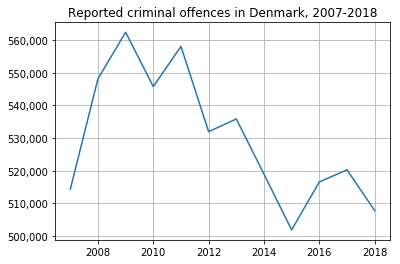

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = crime_land_sort['TID']
y = crime_land_sort['INDHOLD']

ax.plot(x,y)
ax.grid(True)
ax.set_title('Reported criminal offences in Denmark, 2007-2018')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#ax.hist(y,bins=100,density=True,histtype='stepfilled')

**Heterogeneity across Danish regions**

In [14]:
M = crime_api.OMRÅDE.str.contains('Region')

crime_M = crime_api[M]

crime_reg = crime_M.loc[(crime_api['OVERTRÆD'] == 'Overtrædelsens art i alt') & 
              (crime_api['ANMSIGT'] == 'Anmeldt'),:]

crime_reg_sort = crime_reg.sort_values(by='TID',ascending=True)

crime_reg_sort.head(12)

,OMRÅDE,OVERTRÆD,ANMSIGT,TID,INDHOLD
961,Region Hovedstaden,Overtrædelsens art i alt,Anmeldt,2007,192915
1810,Region Syddanmark,Overtrædelsens art i alt,Anmeldt,2007,104273
3094,Region Sjælland,Overtrædelsens art i alt,Anmeldt,2007,64419
11322,Region Midtjylland,Overtrædelsens art i alt,Anmeldt,2007,101943
12175,Region Nordjylland,Overtrædelsens art i alt,Anmeldt,2007,44020
962,Region Hovedstaden,Overtrædelsens art i alt,Anmeldt,2008,201759
1811,Region Syddanmark,Overtrædelsens art i alt,Anmeldt,2008,113217
3095,Region Sjælland,Overtrædelsens art i alt,Anmeldt,2008,75670
12176,Region Nordjylland,Overtrædelsens art i alt,Anmeldt,2008,46149
11323,Region Midtjylland,Overtrædelsens art i alt,Anmeldt,2008,105901


961       2007
962       2008
963       2009
964       2010
60343     2011
72054     2012
89692     2013
97890     2014
110629    2015
107858    2016
150080    2017
142187    2018
Name: TID, dtype: int64


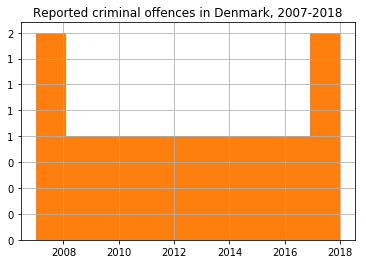

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
crime_hist = crime_reg_sort.loc[crime_reg_sort['OMRÅDE'] == 'Region Hovedstaden',:]
x = crime_hist['TID']
y = crime_hist['INDHOLD']

x.hist(bins=12)

ax.hist(x,bins=10)
ax.grid(True)
ax.set_title('Reported criminal offences in Denmark, 2007-2018')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

print(x)

In [80]:

ax.hist(y,bins=10)
ax.grid(True)
ax.set_title('Reported criminal offences in Denmark, 2007-2018')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


In [67]:
def interactive_figure(area, time, obs):
    
    # a. variables
    area = crime_reg_sort['OMRÅDE'] == 'Region Hovedstaden'
    time = crime_reg_sort['TID']
    obs = crime_reg_sort['INDHOLD']
    
    # b. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.hist(obs,density=True)
    ax.set_xlim([2007,2018]) # fixed x range
    #ax.set_ylim([0,0.8]) # fixed y range
    


In [69]:
widgets.interact(interactive_figure,
    time = widgets.fixed(time),
    area = widgets.Dropdown(description="$Area$", options=['Region Hovedstaden',
                                                         'Region Syddanmark',
                                                         'Region Sjælland',
                                                         'Region Midtjylland',
                                                         'Region Nordjylland'], value='Region Hovedstaden'),
    obs = widgets.fixed(obs));

NameError: name 'time' is not defined

**Summary statistics on sub-criminal offences**

Remove regions and whole country

In [155]:
for val in ['Region', 'Hele landet']: 
    I = crime_api.OMRÅDE.str.contains(val)
    crime_api = crime_api.loc[I == False] # keep everything else
    
#crime_api.sample(100)

split the data into two dataframes in order to get separable variables for "anmeldt" and "sigtelser".

and merge it back into one dataframe.

In [156]:
K = crime_api.OVERTRÆD.str.contains('i alt')

crime_kom = crime_api[K].copy()
crime_kom_anm = crime_kom.loc[(crime_kom['TID'] == 2018) & 
              (crime_api['ANMSIGT'] == 'Anmeldt'),:]
crime_kom_anm.rename(columns = {'INDHOLD':'ANMELDT'}, inplace=True)
del crime_kom_anm['ANMSIGT']
crime_kom_anm.head()


,OMRÅDE,OVERTRÆD,TID,ANMELDT
106074,Slagelse,Voldsforbrydelser i alt,2018,564
106096,Slagelse,Ejendomsforbrydelser i alt,2018,3939
106111,Syddjurs,Andre straffelovsforbrydelser i alt,2018,46
106128,Syddjurs,Særlove i alt,2018,618
106149,Syddjurs,Overtrædelsens art i alt,2018,2203


In [157]:
crime_kom = crime_api[K]
crime_kom_sigt = crime_kom.loc[(crime_kom['TID'] == 2018) & 
              (crime_api['ANMSIGT'] == 'Sigtelser'),:].copy()
crime_kom_sigt.rename(columns = {'INDHOLD':'SIGTELSER'}, inplace=True)
del crime_kom_sigt['ANMSIGT']
#crime_kom_sigt.drop('ANMSIGT', axis=1)
crime_kom_sigt.head()


,OMRÅDE,OVERTRÆD,TID,SIGTELSER
106075,Slagelse,Voldsforbrydelser i alt,2018,380
106097,Slagelse,Ejendomsforbrydelser i alt,2018,823
106112,Syddjurs,Andre straffelovsforbrydelser i alt,2018,35
106129,Syddjurs,Særlove i alt,2018,285
106150,Syddjurs,Overtrædelsens art i alt,2018,644


In [158]:
print(f'Observations in crime_kom_sigt = {len(crime_kom_sigt)}')
print(f'Observations in crime_kom_anm  = {len(crime_kom_anm)}')

Observations in crime_kom_sigt = 690
Observations in crime_kom_anm  = 694


Hvorfor er der forskel??

Der er 4 steder, hvor der er anmeldelser, men ingen sigtelser

In [159]:
crime_kom_merged = pd.merge(crime_kom_anm, crime_kom_sigt, on=['OMRÅDE', 'OVERTRÆD', 'TID'], how='outer')
# replace NaNs with zeroes
crime_kom_merged['SIGTELSER'] = crime_kom_merged['SIGTELSER'].fillna(0)
# For some reason, 'SIGTELSER' turned into float. change them back to integers
crime_kom_merged['SIGTELSER'] = crime_kom_merged['SIGTELSER'].astype(int)
crime_kom_merged.head(10)

,OMRÅDE,OVERTRÆD,TID,ANMELDT,SIGTELSER
0,Slagelse,Voldsforbrydelser i alt,2018,564,380
1,Slagelse,Ejendomsforbrydelser i alt,2018,3939,823
2,Syddjurs,Andre straffelovsforbrydelser i alt,2018,46,35
3,Syddjurs,Særlove i alt,2018,618,285
4,Syddjurs,Overtrædelsens art i alt,2018,2203,644
5,Norddjurs,Straffelov i alt,2018,1534,510
6,Norddjurs,Seksualforbrydelser i alt,2018,36,27
7,Norddjurs,Voldsforbrydelser i alt,2018,255,201
8,Norddjurs,Ejendomsforbrydelser i alt,2018,1196,244
9,Norddjurs,Andre straffelovsforbrydelser i alt,2018,47,38


hvis man laver  #print(crime_kom_merged) ser det så mærkeligt ud, eller er det fint?

Creating a new variable called 'ANDEL SIGTEDE', which is the share of reported crimes that actually ends with a criminal charge.

In [160]:
crime_kom_merged['ANDEL SIGTEDE'] = crime_kom_merged['SIGTELSER'] / crime_kom_merged['ANMELDT'] * 100
# rounding the number to two decimals
crime_kom_merged['ANDEL SIGTEDE'] = round(crime_kom_merged['ANDEL SIGTEDE'], 2)
crime_kom_merged.sample(10)

,OMRÅDE,OVERTRÆD,TID,ANMELDT,SIGTELSER,ANDEL SIGTEDE
602,Nordfyns,Straffelov i alt,2018,1196,368,30.77
241,Faaborg-Midtfyn,Seksualforbrydelser i alt,2018,28,18,64.29
27,Odsherred,Overtrædelsens art i alt,2018,2534,620,24.47
102,Hvidovre,Voldsforbrydelser i alt,2018,238,155,65.13
271,Frederikshavn,Særlove i alt,2018,1079,605,56.07
456,Sønderborg,Straffelov i alt,2018,3431,864,25.18
23,Odder,Andre straffelovsforbrydelser i alt,2018,11,10,90.91
635,Skive,Andre straffelovsforbrydelser i alt,2018,37,26,70.27
294,Rudersdal,Overtrædelsens art i alt,2018,3708,572,15.43
326,Egedal,Ejendomsforbrydelser i alt,2018,1344,93,6.92


In [161]:
crime_kom_merged = crime_kom_merged.sort_values(by='ANDEL SIGTEDE',ascending=False)
crime_kom_merged.head(12)

,OMRÅDE,OVERTRÆD,TID,ANMELDT,SIGTELSER,ANDEL SIGTEDE
78,Samsø,Andre straffelovsforbrydelser i alt,2018,1,1,100.00
520,Ishøj,Seksualforbrydelser i alt,2018,270,262,97.04
687,Viborg,Andre straffelovsforbrydelser i alt,2018,371,354,95.42
614,Faxe,Andre straffelovsforbrydelser i alt,2018,19,18,94.74
499,Hjørring,Seksualforbrydelser i alt,2018,182,167,91.76
23,Odder,Andre straffelovsforbrydelser i alt,2018,11,10,90.91
253,Hørsholm,Seksualforbrydelser i alt,2018,31,28,90.32
170,Fredensborg,Seksualforbrydelser i alt,2018,72,65,90.28
478,Syddjurs,Seksualforbrydelser i alt,2018,53,47,88.68
303,Ikast-Brande,Seksualforbrydelser i alt,2018,26,23,88.46


In [162]:
crime_kom_merged = crime_kom_merged.sort_values(by='ANDEL SIGTEDE',ascending=True)
crime_kom_merged.head(12)

,OMRÅDE,OVERTRÆD,TID,ANMELDT,SIGTELSER,ANDEL SIGTEDE
232,Christiansø,Overtrædelsens art i alt,2018,1,0,0.00
75,Samsø,Seksualforbrydelser i alt,2018,2,0,0.00
231,Christiansø,Særlove i alt,2018,1,0,0.00
281,Læsø,Voldsforbrydelser i alt,2018,1,0,0.00
307,Ikast-Brande,Særlove i alt,2018,14477,412,2.85
308,Ikast-Brande,Overtrædelsens art i alt,2018,16093,839,5.21
130,Gentofte,Ejendomsforbrydelser i alt,2018,4827,326,6.75
326,Egedal,Ejendomsforbrydelser i alt,2018,1344,93,6.92
286,Hørsholm,Særlove i alt,2018,1054,77,7.31
151,Vallensbæk,Ejendomsforbrydelser i alt,2018,655,53,8.09


In [163]:
crime_kom_merged.groupby('OVERTRÆD').mean().sort_values(by='ANDEL SIGTEDE',ascending=False)

,TID,ANMELDT,SIGTELSER,ANDEL SIGTEDE
OVERTRÆD,,,,
Seksualforbrydelser i alt,2018.0,74.040816,51.642857,67.028163
Andre straffelovsforbrydelser i alt,2018.0,104.040404,71.383838,66.182525
Voldsforbrydelser i alt,2018.0,281.373737,170.444444,61.941111
Særlove i alt,2018.0,1442.820000,706.280000,52.378800
Overtrædelsens art i alt,2018.0,5078.240000,1581.580000,31.441100
Straffelov i alt,2018.0,3672.141414,884.141414,24.633737
Ejendomsforbrydelser i alt,2018.0,3213.434343,591.191919,17.905354


Overvej at vende fra long til short for at inddele i anmeldelser og sigtelser.

overvej at ændre variablen overtræd til overtrædelser i alt og fjern "i alt" fra de enkelte obs

**blandet:**

In [17]:
M = crime_api.OMRÅDE.str.contains('Region')

crime_M = crime_api[M]

crime_reg = crime_M.loc[(crime_api['OVERTRÆD'] == 'Overtrædelsens art i alt') & 
              (crime_api['ANMSIGT'] == 'Anmeldt'),:]

crime_reg_sort = crime_reg.sort_values(by='TID',ascending=True)

crime_reg_sort.head(12)

,OMRÅDE,OVERTRÆD,ANMSIGT,TID,INDHOLD
961,Region Hovedstaden,Overtrædelsens art i alt,Anmeldt,2007,192915
1810,Region Syddanmark,Overtrædelsens art i alt,Anmeldt,2007,104273
3094,Region Sjælland,Overtrædelsens art i alt,Anmeldt,2007,64419
11322,Region Midtjylland,Overtrædelsens art i alt,Anmeldt,2007,101943
12175,Region Nordjylland,Overtrædelsens art i alt,Anmeldt,2007,44020
962,Region Hovedstaden,Overtrædelsens art i alt,Anmeldt,2008,201759
1811,Region Syddanmark,Overtrædelsens art i alt,Anmeldt,2008,113217
3095,Region Sjælland,Overtrædelsens art i alt,Anmeldt,2008,75670
12176,Region Nordjylland,Overtrædelsens art i alt,Anmeldt,2008,46149
11323,Region Midtjylland,Overtrædelsens art i alt,Anmeldt,2008,105901


In [7]:
Entry_wb = wb.download(indicator='IC.BUS.NREG', country=['SE','DK','NO'], start=2016, end=2016)

In [16]:
Entry_wb = Entry_wb.rename(columns = {'IC.BUS.NREG':'Number of new entrants'})
#Entry_wb = Entry_wb.rename(columns = {'IC.BUS.NREG':'Number of new entrants'})
Entry_wb = Entry_wb.reset_index()
Entry_wb.head(10)

,level_0,index,country,year,Number of new entrants
0,0,0,Denmark,2016,36384
1,1,1,Norway,2016,27920
2,2,2,Sweden,2016,49960


In [18]:
geoplotlib.dot(Entry_wb.loc[:,['country','Number of new entrants']])
geoplotlib.show()


Traceback (most recent call last):
  File "C:\Users\Lykke Sterll\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3078, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 140, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 162, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1492, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1500, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'lon'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Lykke Sterll\Anaconda3\lib\site-packages\geoplotlib\__init__.py", line 32, in _runapp
    app.start()
  File "C:\Users\Lykke Sterll\Anaconda3\lib\site-packages\geoplotlib\core.py", line 364, in start
    self.proj.fit(BoundingBox.from_bboxes([l.bbox() for l in self.geoplotlib_confi